## **Import Libraries**
___

In [2]:
# Import Analytical Libraries
import pandas as pd
import numpy as np 

# Import visualization libraries
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import seaborn as sns

# Statistics Libraries
from scipy.stats import kurtosis, skew, shapiro
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mutual_info_score, silhouette_score
from sklearn.cluster import KMeans
# Misc Libraries
from typing import Optional, Union

## **Read Files**
___

In [3]:
# Read in the HR attrition csv file.
df = pd.read_csv('HR-Employee-Attrition.csv')

# Return all columns when displaying dataframe.
pd.set_option('display.max_columns', None)

# Set the style of the plots
plt.style.use('ggplot')
# Set default colormap for continuous data (both Matplotlib and Seaborn)
plt.rcParams['image.cmap'] = 'rocket'
# Set default palette for categorical data
sns.set_palette('rocket')

## **Dataset Identification**
___

In [4]:
# Return the shape and size of the dataset
print(f'Shape of the dataset: {df.shape}\nSize of the dataset: {df.size}')

Shape of the dataset: (1470, 35)
Size of the dataset: 51450


In [5]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [6]:
# Return the datatypes of each feature in the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Reaturn the top 5 rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
# Return the bottom 5 rows of the dataset
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


## **Dataset Preprocessing**
___

### 1. **Data Cleaning**

#### 1.1 **Duplicate Values**

In [9]:
# Return the total number of duplicated values in the dataset
dupes = df.duplicated().sum()
print(f'Total duplicate values within the dataset: {dupes}')

Total duplicate values within the dataset: 0


#### 1.2 **Null Values**

In [10]:
# Return the total number of null values in the dataset
nulls = np.count_nonzero(df.isnull().values)
print(f'Total null values in the dataset: {nulls}')

Total null values in the dataset: 0


#### 1.3 **Miscellaneous Data Errors**

##### 1.3.1 **Categorical Features**

In [11]:
# Store a subset of the dataset with only the categorical features
categorical_subset = df.select_dtypes(include='object')
categorical_subset

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [12]:
# Return the total number of unique values in the categorical features
categorical_subset.apply(lambda x: x.nunique())

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [13]:
# Return the unique values in each categorical feature
categorical_subset.apply(lambda x: x.unique())

Attrition                                                 [Yes, No]
BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
Department         [Sales, Research & Development, Human Resources]
EducationField    [Life Sciences, Other, Medical, Marketing, Tec...
Gender                                               [Female, Male]
JobRole           [Sales Executive, Research Scientist, Laborato...
MaritalStatus                           [Single, Married, Divorced]
Over18                                                          [Y]
OverTime                                                  [Yes, No]
dtype: object

In [14]:
# Check the total number of values in the Over18 feature
categorical_subset['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [15]:
# Create a copy of the dataframe
df2 = df.copy()

# Drop the faeture Over18 because all the records are individuals that are over the age of 18.
df2.drop(columns=['Over18'], inplace=True)

##### 1.3.2 **Numeric Features**

In [16]:
# Store a subset of the dataset with only the numeric features
numeric_subset = df2.select_dtypes(include='number')
numeric_subset

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


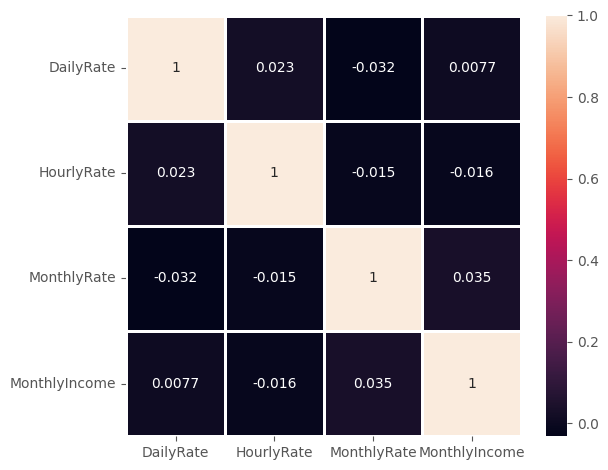

In [17]:
# Return the features that would determine monthly income and determine if there is a relationship between 
# the rates and the monthly income
import re
rate_features = [column for column in numeric_subset
                 if re.search('[rR]ate\\b', column) != None] + ['MonthlyIncome']

corr_matrix = df2.loc[:, rate_features].corr()
sns.heatmap(corr_matrix, annot=True, linewidths=0.8)
plt.tight_layout()
plt.show()

In [18]:
# Drop the DailyRate, HourlyRate and MonthlyRate features because they are in no way related to 
# MonthlyIncome. This would be the assumption as these values would be used to calculate the MonthlyIncome
df2.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate'], inplace=True)

In [19]:
# Return the total number of unique values in each numeric feature
unique_count_numeric = numeric_subset.apply(lambda x: x.nunique())
unique_count_numeric

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [20]:
# Return the features with 5 or less unique values
unique_count_numeric[unique_count_numeric <= 5]

Education                   5
EmployeeCount               1
EnvironmentSatisfaction     4
JobInvolvement              4
JobLevel                    5
JobSatisfaction             4
PerformanceRating           2
RelationshipSatisfaction    4
StandardHours               1
StockOptionLevel            4
WorkLifeBalance             4
dtype: int64

In [21]:
# Drop the EmployeeCount and StandardHours features as there is only one single value within each feature
df2.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

In [22]:
# Return the features with completely unique values for each record
unique_count_numeric[unique_count_numeric == df2.shape[0]]

EmployeeNumber    1470
dtype: int64

In [23]:
# Drop the EmployeeNumber feature as this is an identification feature and would not bring any significant 
# insights into our analysis
df2.drop(columns=['EmployeeNumber'], inplace=True)

#### 1.4 **Outlier Values**

In [24]:
def outlierIQR(column: str, dataframe: Optional[pd.DataFrame]=df, return_outliers: Optional[bool]=False) -> None:
    """
    A function that outputs features from the pandas.dataframe object passed in the dataframe 
    parameter that have outlier values, and the total number of outlier values in the feature. 
    The outliers are found using the IQR method. 

    Args:
        column: string.
            - Name of the column that can be found   within the pandas.dataframe object passed in the dataframe
            parameter.
        dataframe: pandas.dataframe.
            - A pandas dataframe.

    Returns:
        None
    """
    # Store the quantile values 
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Return the interquartile range
    IQR = q3 - q1

    # Create the upper and lower limits 
    upper_limit = dataframe[column] > q3 + (IQR * 1.5)
    lower_limit = dataframe[column] < q1 - (IQR * 1.5)

    # Return the outliers of the feature
    outliers = dataframe[column][upper_limit | lower_limit]

    if len(outliers) > 0:
        print(f'{column}\nTotal Outliers: {len(outliers)}\n')
        if return_outliers ==True:
            return outliers.index.to_list()


for feature in numeric_subset:
    outlierIQR(feature)

MonthlyIncome
Total Outliers: 114

NumCompaniesWorked
Total Outliers: 52

PerformanceRating
Total Outliers: 226

StockOptionLevel
Total Outliers: 85

TotalWorkingYears
Total Outliers: 63

TrainingTimesLastYear
Total Outliers: 238

YearsAtCompany
Total Outliers: 104

YearsInCurrentRole
Total Outliers: 21

YearsSinceLastPromotion
Total Outliers: 107

YearsWithCurrManager
Total Outliers: 14



#### 1.5 **Feature Engineering**

##### 1.5.1 **Bin Age Feature**

In [25]:
# Create a copy of the dataframe 
df3 = df2.copy()

In [26]:
# Store the desired labels for the binning of the Age feature.
age_labels = ['Youth', 'Young Adult', 'Middle Age', 'Old Age']
# Store the bin values 
age_bins = [0, 19, 39, 59, np.inf]

# Bin the values and store as a variable
age_feature_binning = pd.cut(df2['Age'], bins=age_bins, labels=age_labels)

# Insert the values on the right of the Age feature.
df2.insert(df2.columns.get_loc('Attrition'), 'AgeBin', age_feature_binning)

##### 1.5.2 **Bin MonthlyIncome Feature**

In [27]:
# Create a copy of the dataframe
df3 = df2.copy()

<Axes: xlabel='MonthlyIncome'>

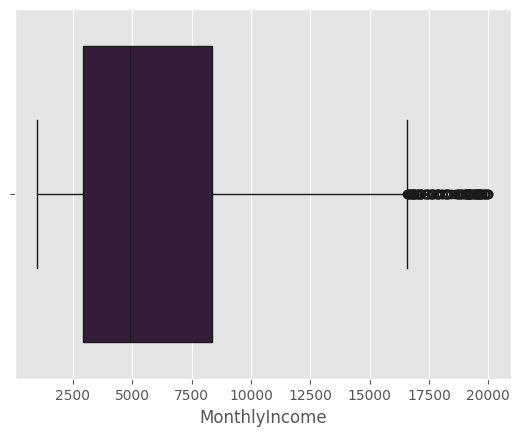

In [28]:
# Visualize boxplot of the feature
sns.boxplot(df3['MonthlyIncome'], orient='h')

In [29]:
# Use quantile values to determine values to bin with 
q1 = df3['MonthlyIncome'].quantile(0.25)
q2 = df3['MonthlyIncome'].quantile(0.5)
q3 = df3['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1 
whisker = q3 + (iqr * 1.5)

# Store the labels for the binning of the MonthlyIncome feature
income_labels = ['Low', 'Average', 'Medium', 'High']
# Store bin values
income_bins = [0, q1, q3, whisker, np.inf]

# Bin the values and store as a variable
income_feature_bin = pd.cut(df3['MonthlyIncome'], bins=income_bins, labels=income_labels)
# Insert the column to the lefft of the MonthlyRate feature.
df3.insert(df3.columns.get_loc('NumCompaniesWorked'), 'IncomeBin', income_feature_bin)

##### 1.5.3 **Label Encoding**

In [30]:
# Create a copy of the dataframe
df4 = df3.copy()

In [31]:
def labelEncoding(dataframe:pd.DataFrame, column:str, value_order: list) -> pd.Series:
    """
    Performs ordinal encoding on a specified column of a DataFrame based on a given order of values.

    Args:
        dataframe :
            - The input DataFrame containing the column to be encoded.
        column :
            - The name of the column to be encoded.
        value_order :
            - A list of categories in the desired ordinal order. The list should contain all possible unique values
            from the column, arranged in increasing order of rank (i.e., from lowest to highest).

    Returns:
    pd.Series
        The encoded column, where each category has been replaced by an integer according to its ordinal position
        in the `value_order` list. The transformation is done in-place on the original DataFrame column.
    
    """
    # Instantiate the label encoder
    encoder = OrdinalEncoder(categories=[value_order], dtype=int)

    # Fit and Transform the column
    dataframe[column] = encoder.fit_transform(dataframe[[column]])

    return dataframe[column]


df4['BusinessTravel'] = labelEncoding(
    df4, 'BusinessTravel', ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
)
df4['IncomeBin'] = labelEncoding(
    df4, 'IncomeBin', ['Low', 'Average', 'Medium', 'High']
)
df4['AgeBin'] = labelEncoding(
    df4, 'AgeBin', ['Youth', 'Young Adult', 'Middle Age', 'Old Age']
)

##### 1.5.4 **One-Hot Encoding**

In [32]:
df4.select_dtypes(exclude='number').columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [33]:
# Create a copy of the dataframe
df5 = df4.copy()

# Store the categorical feaures
categorical_features = df4.select_dtypes(exclude='number').columns

# Store as encoded dataframe
encoded_df = pd.get_dummies(df5, columns=categorical_features, drop_first=True,dtype=int)
encoded_df

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,1,1,2,2,3,2,4,5993,1,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,2,2,8,1,3,2,2,2,5130,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1,2,2,4,2,1,3,2090,0,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1,2,3,4,4,3,1,3,2909,0,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,1,1,2,1,1,3,1,2,3468,1,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,2,23,2,3,4,2,4,2571,0,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,1,1,6,1,4,2,3,1,9991,2,4,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,1,1,4,3,2,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,2,2,2,3,4,2,2,2,5390,1,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


## **Feature Importance**
___

In [34]:
# Split the datasets into dependent and independent variables
X = encoded_df.drop(columns=['Attrition_Yes'])
y = encoded_df['Attrition_Yes']

In [36]:
# Use the Mutual Info Score library to return the top ten most important features to determine attrition
mi_score = {column: mutual_info_score(X[column], y) for column in X}
mi_score_df = pd.DataFrame(mi_score, index=['MI Score']).T.sort_values(by='MI Score', ascending=False)
top_10_important_features = mi_score_df[:10]
top_10_important_features

,MI Score
MonthlyIncome,0.402905
Age,0.039113
TotalWorkingYears,0.037545
YearsAtCompany,0.030988
OverTime_Yes,0.027688
YearsWithCurrManager,0.025229
JobLevel,0.024980
YearsInCurrentRole,0.023591
IncomeBin,0.022202
StockOptionLevel,0.020984


## **Clustering**
___

In [37]:
# Store the features we will be clustering with 
cluster_features = X.loc[:, ['MonthlyIncome', 'Age', 'TotalWorkingYears', 'YearsAtCompany']]

cluster_features

,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany
0,5993,41,8,6
1,5130,49,10,10
2,2090,37,7,0
3,2909,33,8,8
4,3468,27,6,2
...,...,...,...,...
1465,2571,36,17,5
1466,9991,39,9,7
1467,6142,27,6,6
1468,5390,49,17,9


In [38]:
outliers = []
for feature in cluster_features:
    feature_outlier = outlierIQR(feature, return_outliers=True)
    if isinstance(feature_outlier, type(None)):
        continue
    outliers.append(feature_outlier)

# Flatten the nested list
outliers = [element for sublist in outliers for element in sublist]

# Convert the outliers to a set to remove the duplicated index values, and convert to a list again
outliers = list(set(outliers))

MonthlyIncome
Total Outliers: 114

TotalWorkingYears
Total Outliers: 63

YearsAtCompany
Total Outliers: 104



In [39]:
# Store the outlier dataframe
outlier_df = cluster_features.loc[outliers, :]
outlier_df

,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany
1024,17169,47,26,20
523,3221,50,20,20
526,4553,39,20,20
18,15427,53,31,25
1043,16598,53,35,9
...,...,...,...,...
489,16627,43,21,1
1008,17328,54,29,20
497,19513,44,26,2
1009,19701,58,32,9


In [40]:
# Store the non-outlier dataframe
non_outlier_df = cluster_features[~cluster_features.index.isin(outliers)]
non_outlier_df

,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany
0,5993,41,8,6
1,5130,49,10,10
2,2090,37,7,0
3,2909,33,8,8
4,3468,27,6,2
...,...,...,...,...
1465,2571,36,17,5
1466,9991,39,9,7
1467,6142,27,6,6
1468,5390,49,17,9


In [41]:
def statistics(dataframe: pd.DataFrame) -> None:
    """
    A function that outputs statistics for features with more than 12 unique values.
    The skew and Kurtosis values, along with the p-value from the Shapiro-Wilk test. These values help
    evaluate the distribution of the features of the dataframe passed in to the dataframe parameter. 

    Args: 
        dataframe:
            - A pandas dataframe object.

    Returns: 
        None
    """
    for column in dataframe:
        if dataframe[column].nunique() > 5:
            _skew = skew(dataframe[column])
            _kurtosis = kurtosis(dataframe[column], fisher=True)
            print(
                f"\n{column}\n"
                f"skew: {_skew:.4f}\n"
                f"kurtosis: {_kurtosis:.4f}"
            )

            # Perform Shapiro-Wilk test
            stat, p_value = shapiro(dataframe[column])

            # Print the results
            print(f"KS Normality test: {stat:.4f}")
            print(f"P-value: {p_value:.4f}")

            # Interpret the p-value
            alpha = 0.05
            if p_value > alpha:
                print("The data is likely normally distributed (fail to reject H0).")
            else:
                print("The data is not normally distributed (reject H0).")

            # Check the absolute values of each skew value of a feature
            if np.abs(_skew) < 0.5:
                print('distribution is almost symmetrical')
            elif 0.5 <= np.abs(_skew) <= 1:
                print('distribution is modertely skewed')
            else:
                print('distribution is highly skewed')
            
            # Extremity of tail distribution
            if _kurtosis > 0:
                print(
                    f'Leptokurtic distribution - heavier tails and a sharper peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with higher peakedness '
                    f'and a greater probability of extreme values.\n'
                )
            elif _kurtosis < 0:
                print(
                    f'Platykurtic distribution - lighter tails and a flatter peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with less peakedness ' 
                    f'and a lower probability of extreme values.\n'
                )
            else:
                print(
                    f'Mesokurtic distribution - similar peak and tail shape as the normal '
                    f'distribution.\n'
                    )
                

statistics(non_outlier_df)


MonthlyIncome
skew: 1.2383
kurtosis: 1.2263
KS Normality test: 0.8868
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type of distribution is often associated with higher peakedness and a greater probability of extreme values.


Age
skew: 0.5816
kurtosis: 0.1020
KS Normality test: 0.9723
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is modertely skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type of distribution is often associated with higher peakedness and a greater probability of extreme values.


TotalWorkingYears
skew: 0.7434
kurtosis: 0.5442
KS Normality test: 0.9553
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is modertely skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.

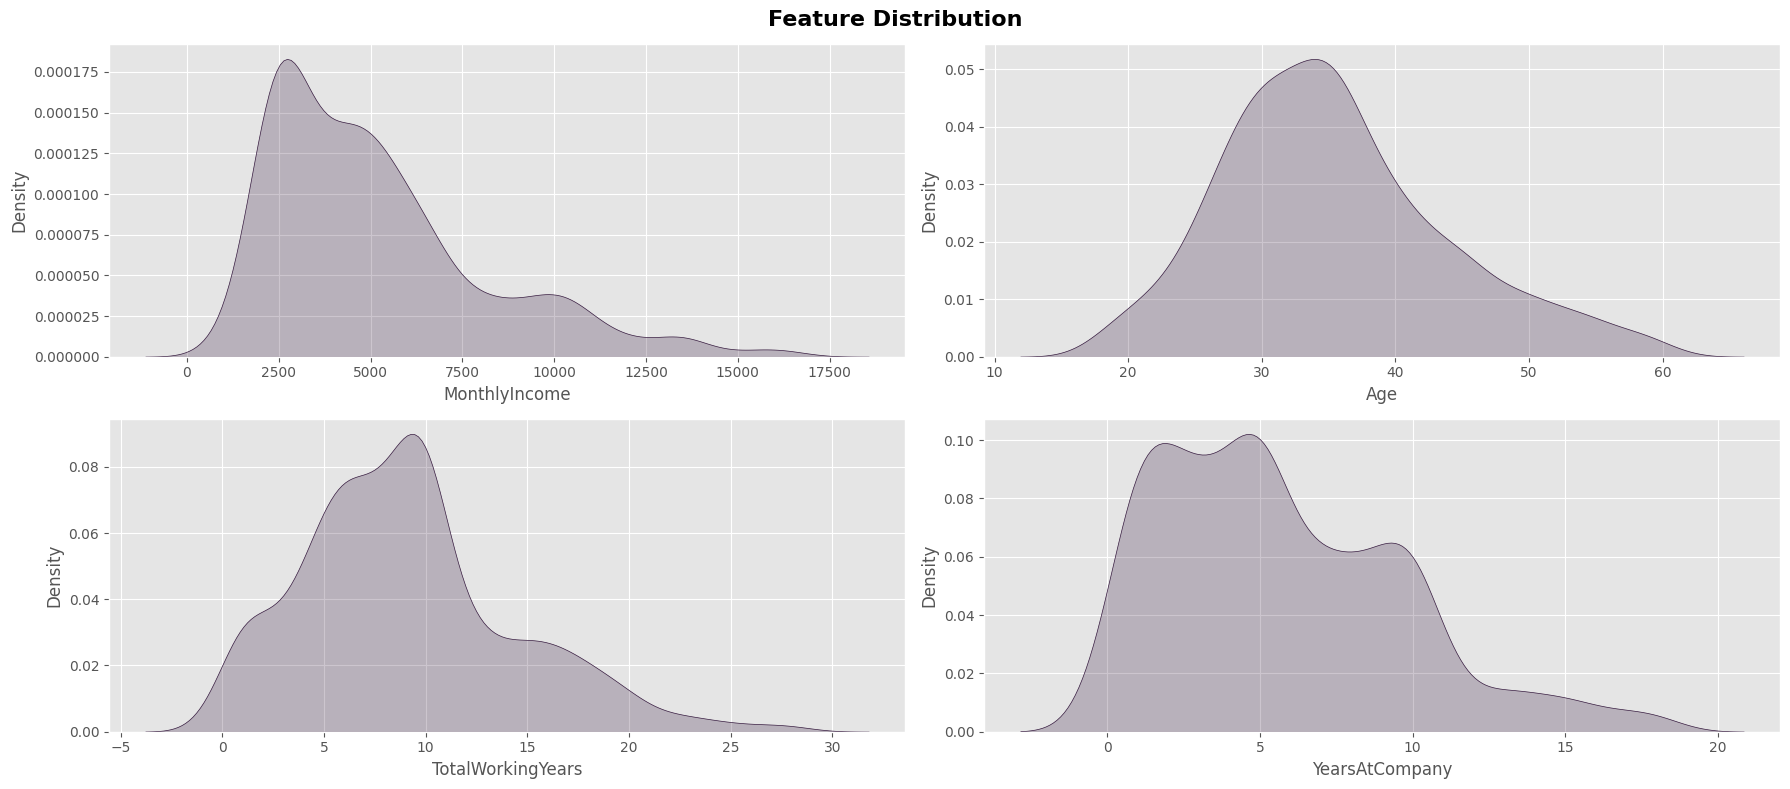

In [42]:
plt.figure(figsize=(18, 8))

for i, feature in enumerate(non_outlier_df):
    plt.subplot(2, 2, 1 + i)
    sns.kdeplot(non_outlier_df[feature], fill=True)
    plt.suptitle('Feature Distribution', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

In [43]:
def featureScaling(dataframe: pd.DataFrame, column: str, transform_features: list) -> dict[str, np.ndarray]:
    """
    Applies different scaling or transformation techniques to a feature based on its characteristics.

    Args:
        - dataframe (pd.DataFrame): The DataFrame containing the features.
        - column (str): The name of the feature/column to scale or transform.
        - transform_features (list): List of feature names that need a log transformation 
        followed by robust scaling.

    Returns:
        - dict: A dictionary with the column name as the key and the scaled or transformed 
        feature values as the value.

    Raises:
    ValueError: If an incorrect column name is provided.
    """
    if column in transform_features:
        # Apply Log transformation
        transform = np.log1p(dataframe[[column]])

        # Instantiate the RobustScaler
        r_scaler = RobustScaler()
        # Fit and transform the feature
        transform_scale = r_scaler.fit_transform(transform)

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}
        print(f'{column} has been transformed and scaled')

        return transform_data
    
    else:
        # Instantiate the RobustScaler
        r_scaler = RobustScaler()

        # Fit the model with the feature
        transform_scale = r_scaler.fit_transform(dataframe[[column]])

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}
        print(f'{column} Has been scaled')

        return transform_data


In [44]:
transform_scale_features = ['MonthlyIncome']

table_data = {}
for column in non_outlier_df:
    data = featureScaling(non_outlier_df, column, transform_scale_features)
    table_data.update(data)

scaled_df = pd.DataFrame(table_data)

MonthlyIncome has been transformed and scaled
Age Has been scaled
TotalWorkingYears Has been scaled
YearsAtCompany Has been scaled


In [45]:
scaled_df

,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany
0,0.340992,0.636364,-0.166667,0.166667
1,0.158071,1.363636,0.166667,0.833333
2,-0.898165,0.272727,-0.333333,-0.833333
3,-0.509267,-0.090909,-0.166667,0.500000
4,-0.302513,-0.636364,-0.500000,-0.500000
...,...,...,...,...
1280,-0.654548,0.181818,1.333333,0.000000
1281,0.942295,0.454545,0.000000,0.333333
1282,0.369884,-0.636364,-0.500000,0.166667
1283,0.216234,1.363636,1.333333,0.666667


#### 1. **Selecting K-Clusters**

In [46]:
# Instantiate the kmeans clustering model 
def kmeansInertias(k, r, X):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(X)

    return kmeans.inertia_


def elbow_Kmeans(X, dataset: str, max_k=10, r=42):
    inertias = [kmeansInertias(i, r=r, X=X) for i in range(1, max_k + 1)]
    sns.lineplot(x=range(1, 11), y=inertias, marker='o')
    plt.xlabel('K: Number of clusters')
    plt.ylabel('Inertia')
    plt.title(f'{dataset} Elbow Graph')
    plt.grid(True)


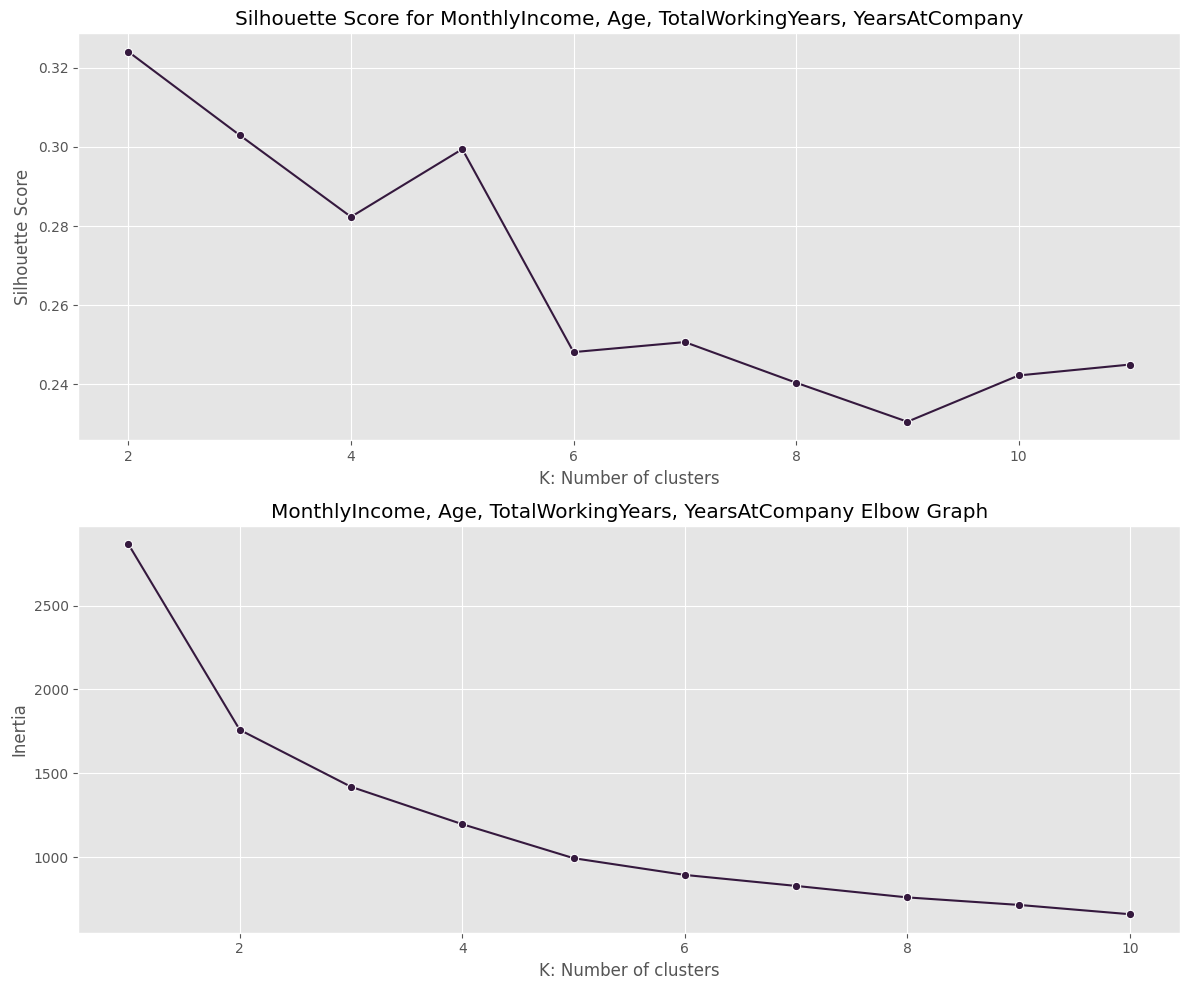

In [47]:
def silhouetteScore(dataframe: pd.DataFrame, dataset: str) -> None:
    # Silhouette score method
    kmax = 10
    sil = []
    plt.plot()
    for k in range(2, kmax+2):
        kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
        kmeans.fit(dataframe)
        labels = kmeans.labels_
        sil.append(silhouette_score(dataframe, labels, metric='euclidean'))

    sns.lineplot(x=range(2, kmax+2), y=sil, marker='o')
    plt.title(f'Silhouette Score for {dataset}')
    plt.xlabel('K: Number of clusters')
    plt.ylabel(f"Silhouette Score")
    plt.grid(True)


plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
silhouetteScore(scaled_df, dataset='MonthlyIncome, Age, TotalWorkingYears, YearsAtCompany')
plt.subplot(2, 1, 2)
elbow_Kmeans(scaled_df, dataset='MonthlyIncome, Age, TotalWorkingYears, YearsAtCompany')

plt.tight_layout()
plt.show()

In [48]:
# Predict clusters for non-outlier dataset
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels_ = kmeans.fit_predict(scaled_df)

# Insert predictions into the scaled dataframe
non_outlier_df['Cluster'] = cluster_labels_

non_outlier_df.head()

C:\Users\Lenovo S145\AppData\Local\Temp\ipykernel_3388\1167165333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outlier_df['Cluster'] = cluster_labels_


,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany,Cluster
0,5993,41,8,6,1
1,5130,49,10,10,1
2,2090,37,7,0,0
3,2909,33,8,8,0
4,3468,27,6,2,0


In [49]:
# Return the outliers of each feature and store as a seperate dataframe
feature_outliers_ = {}
for feature in cluster_features:
    feature_outlier = outlierIQR(feature, return_outliers=True)
    if isinstance(feature_outlier, type(None)):
        continue
    dct = {f'{feature}_outliers': feature_outlier}
    feature_outliers_.update(dct)

MonthlyIncome
Total Outliers: 114

TotalWorkingYears
Total Outliers: 63

YearsAtCompany
Total Outliers: 104



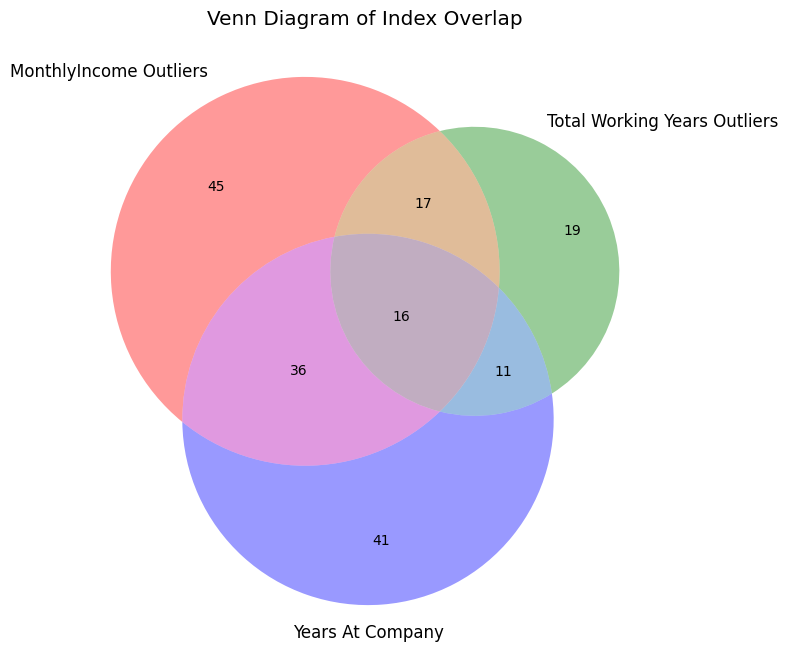

In [50]:
# Creating three DataFrames
monthly_income_outliers_df = cluster_features.loc[feature_outliers_.get('MonthlyIncome_outliers'), :]
total_working_years_outliers_df = cluster_features.loc[feature_outliers_.get('TotalWorkingYears_outliers'), :]
years_at_company_outliers_df = cluster_features.loc[feature_outliers_.get('YearsAtCompany_outliers'), :]

# Extracting the index sets from the DataFrames
set1 = set(monthly_income_outliers_df.index)
set2 = set(total_working_years_outliers_df.index)
set3 = set(years_at_company_outliers_df.index)

# Create a Venn diagram using the index sets
plt.figure(figsize=(8, 8))
venn = venn3([set1, set2, set3], ('MonthlyIncome Outliers', 'Total Working Years Outliers', 'Years At Company'))

# Display the Venn diagram
plt.title("Venn Diagram of Index Overlap")
plt.show()


In [51]:
all_int_indexes = (set1.intersection(set2)).intersection(set3)
monthly_income_AND_years_at_company_indexes = (set1.intersection(set3)).difference(all_int_indexes)
monthly_income_AND_total_working_years_indexes = (set1.intersection(set2)).difference(all_int_indexes)
total_working_years_AND_years_at_company_indexes = (set2.intersection(set3)).difference(all_int_indexes)
years_at_company_ONLY_index = (set3.difference(set2)).difference(set1)
monthly_income_ONLY_index = (set1.difference(set2)).difference(set3)
total_working_years_ONLY_index = (set2.difference(set1)).difference(set3)

# Confirm that the total indexes per variable match the Venn Diagram totals
print(
    f'Intersect group: {len(all_int_indexes)}\n'
    f'Monthly Income and Years at Company group: {len(monthly_income_AND_years_at_company_indexes)}\n'
    f'Monthly Income and Total Working Years group: {len(monthly_income_AND_total_working_years_indexes)}\n'
    f'Total Working Years and Years at Company group: {len(total_working_years_AND_years_at_company_indexes)}\n'
    f'Years at Company group: {len(years_at_company_ONLY_index)}\n'
    f'Monthly Income group: {len(monthly_income_ONLY_index)}\n'
    f'Total Working Years group: {len(total_working_years_ONLY_index)}\n'
)

# Set Cluster column for outlier df as None
outlier_df['Cluster'] = None

# Manually add the cluster names from the outliers
outlier_df.loc[list(all_int_indexes), 'Cluster'] = 2
outlier_df.loc[list(monthly_income_AND_years_at_company_indexes), 'Cluster'] = 3
outlier_df.loc[list(monthly_income_AND_total_working_years_indexes), 'Cluster'] = 4
outlier_df.loc[list(total_working_years_AND_years_at_company_indexes), 'Cluster'] = 5
outlier_df.loc[list(years_at_company_ONLY_index), 'Cluster'] = 6
outlier_df.loc[list(monthly_income_ONLY_index), 'Cluster'] = 7
outlier_df.loc[list(total_working_years_ONLY_index), 'Cluster'] = 8

Intersect group: 16
Monthly Income and Years at Company group: 36
Monthly Income and Total Working Years group: 17
Total Working Years and Years at Company group: 11
Years at Company group: 41
Monthly Income group: 45
Total Working Years group: 19



In [52]:
# Concatenate the outlier and non outlier dataframes and store the cluster column only as the dataframe
cluster_df =  pd.concat([non_outlier_df, outlier_df], axis=0).loc[:, ['Cluster']]

# Concatenate the cluster dataframe to the df3 dataframe. This will be the dataframe we use to make our analysis
analysis_df = df3.copy()
analysis_df = pd.concat([analysis_df, cluster_df], axis=1)
analysis_df

,Age,AgeBin,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,IncomeBin,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,41,Middle Age,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,Average,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Middle Age,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,Average,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,Young Adult,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,Low,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0
3,33,Young Adult,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,Low,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Young Adult,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,Average,9,No,12,3,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Young Adult,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,Low,4,No,17,3,3,1,17,3,3,5,2,0,3,1
1466,39,Young Adult,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,Medium,4,No,15,3,1,1,9,5,3,7,7,1,7,1
1467,27,Young Adult,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,Average,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0
1468,49,Middle Age,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,2,Sales Executive,2,Married,5390,Average,2,No,14,3,4,0,17,3,2,9,6,0,8,1


## **Exploratory Data Analysis (EDA)**
___

In [53]:
# Check the data type of each feature
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   AgeBin                    1470 non-null   category
 2   Attrition                 1470 non-null   object  
 3   BusinessTravel            1470 non-null   object  
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   object  
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   object  
 13  JobSatisfaction           1470 non-null   int64 

In [54]:
# Create a subset of the analysis dataframe to analyse the clusters
analysis_subset = analysis_df.loc[:, ['Cluster', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']]

#  Filter to only the non outlier clusters 
non_outlier_analysis = analysis_subset[analysis_subset['Cluster'] <= 1]
non_outlier_analysis


,Cluster,MonthlyIncome,YearsAtCompany,TotalWorkingYears
0,1,5993,6,8
1,1,5130,10,10
2,0,2090,0,7
3,0,2909,8,8
4,0,3468,2,6
...,...,...,...,...
1465,1,2571,5,17
1466,1,9991,7,9
1467,0,6142,6,6
1468,1,5390,9,17


In [55]:
#  Filter to only the outlier clusters 
outlier_analysis = analysis_subset[analysis_subset['Cluster'] > 1]
outlier_analysis

,Cluster,MonthlyIncome,YearsAtCompany,TotalWorkingYears
18,5,15427,25,31
25,7,19094,14,26
28,6,10248,22,24
29,7,18947,2,22
45,3,19545,22,23
...,...,...,...,...
1404,6,4332,20,20
1437,7,19431,6,21
1443,3,18880,22,24
1445,6,13570,20,21


In [56]:
def violinPlot(dataframe: pd.DataFrame):
    plt.figure(figsize=(24, 16))

    for i, column in enumerate(dataframe.drop(columns=['Cluster'])):
        plt.subplot(3, 4, 1 + i)
        sns.violinplot(x=dataframe['Cluster'], y=dataframe[column], hue=dataframe['Cluster'], legend=False)
        sns.violinplot(y=dataframe[column], palette='gray', linewidth=1.0)
        plt.title(f'{column} Value by Cluster')
        plt.ylabel(f'{column} Value')

    plt.suptitle('Cluster Analysis')
    plt.tight_layout()
    plt.show()

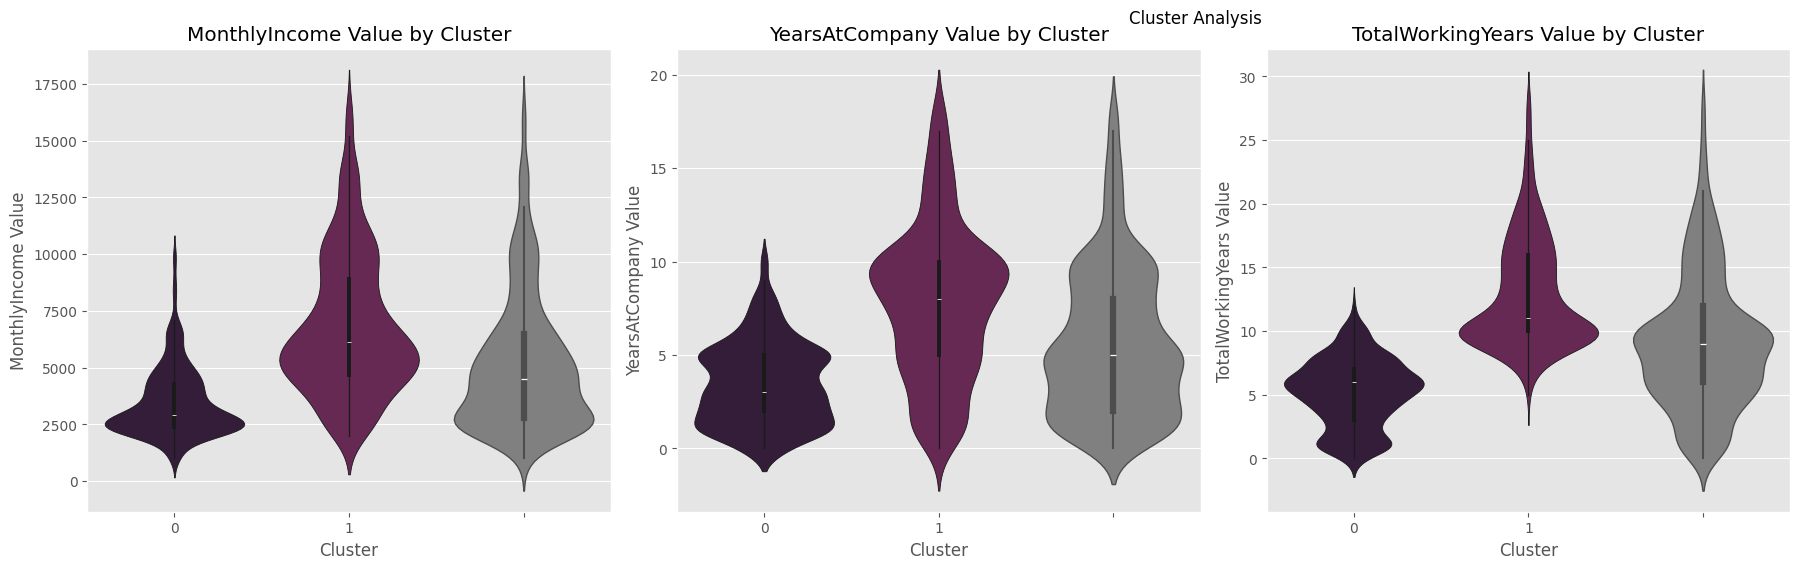

In [57]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
violinPlot(non_outlier_analysis)

`NON-OUTLIER CLUSTER CLASSIFICATION`:

**Cluster 0**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~2500, to ~4500, which is below the average of the employees that arent outlier earniers, which is ~5000. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~2.5 to 5 years at the company. On average, for employees that arent outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, employees worked ~ 5 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~3 - ~7 years. On average, for employees that arent outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, employees have been working on average, ~10 years

- *Cluster Classification*
    - **Early-career professionals**

**Cluster 1**
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~5000, to ~9500, which is above the average of the employees that arent outlier earniers, which is ~5000. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~5 to ~10 years at the company. On average, for employees that arent outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, employees worked ~ 5 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~10 - ~17 years. On average, for employees that arent outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, employees have been working on average, ~10 years

- *Cluster Classification*
    - **Mid-career professionals**

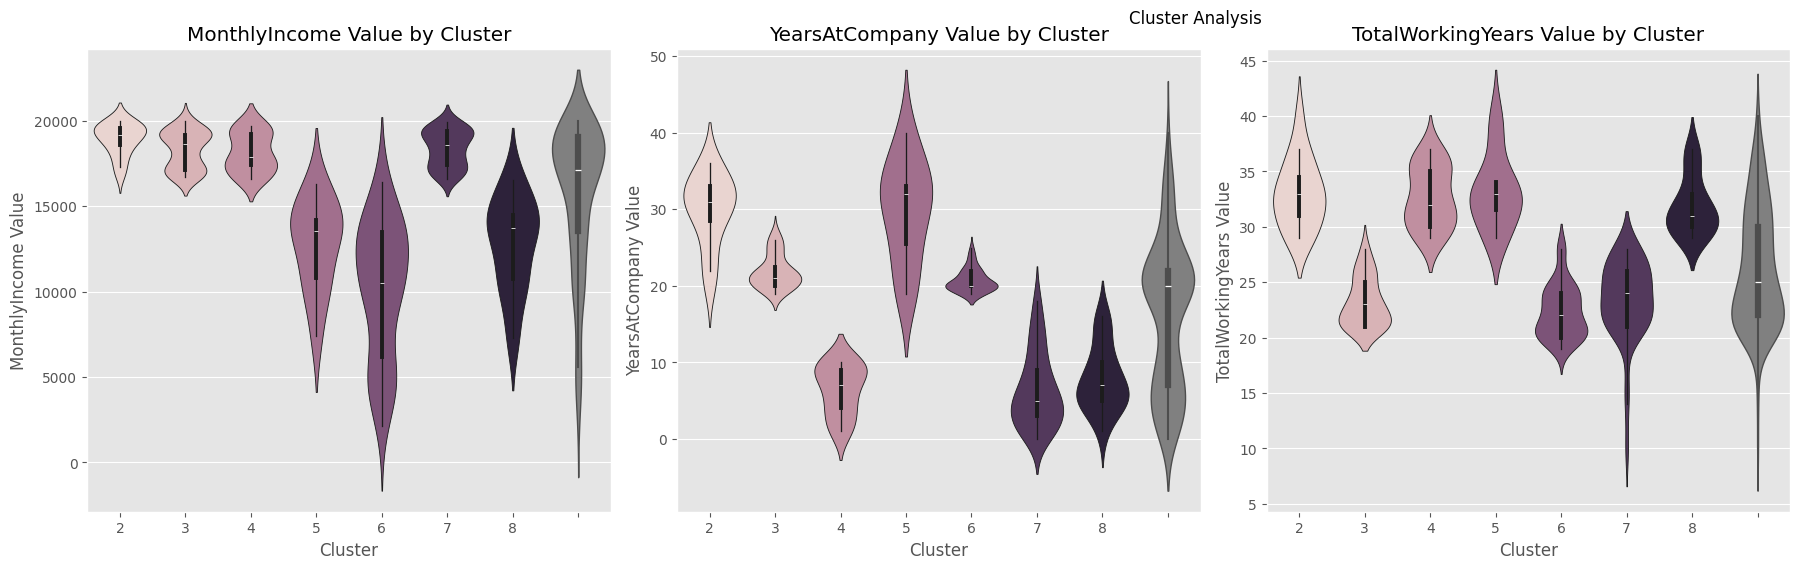

In [58]:
violinPlot(outlier_analysis)

`CLUSTER CLASSIFICATION`:

**Cluster 2**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~18000, to ~20000, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~28 to ~32 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~32 - ~35 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Senior Executives**

**Cluster 3**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~17500, to ~20000, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~20 to ~22 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~20 - ~25 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Experienced senior professionals**

**Cluster 4**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~17500, to ~20000, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~5 to ~9 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~30 - ~35 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Highly experienced late-career professionals**

**Cluster 5**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~11000, to ~14000, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~25 to ~32 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~32.5 - ~34 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Veteran Professional**

**Cluster 6**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~6000, to ~13000, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~20 to ~22 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~20 - ~24 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Mid-to-senior professionals**

**Cluster 7**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~15000, to ~19500, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~3 to ~9 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~18 - ~27 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Specialized professionals**

**Cluster 8**:
- *MonthlyIncome*
    - Majority of the employees in this cluster earn between ~11000, to ~14500, which is above the average of the employees that are outlier earniers, which is ~17500. 

- *YearsAtCompany*
    - Majority of the employees in this cluster have worked between ~5 to ~10 years at the company. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have worked ~20 years at the company 

- *TotalWorkinYears*
    - Majority of the employees in this cluster have worked between ~30 - ~33 years. On average, for employees that are outliers within the MonthlyIncome, YearsAtCompany and TotalWorkingYears, have been working for, ~25 years

- *Cluster Classification*
    - **Experienced Mid-Salary Professionals**

#### **Bivariate Analysis with Attrition Feature**

In [59]:
category_one = [column for column in df3.drop(columns=['Attrition']).select_dtypes(include=['object', 'category']) if df3[column].nunique() <= 3]
category_two = [column for column in df3.drop(columns=['Attrition']).select_dtypes(include=['object', 'category']) if df3[column].nunique() > 3]

In [60]:
category_one

['BusinessTravel', 'Department', 'Gender', 'MaritalStatus', 'OverTime']

In [61]:
category_two

['AgeBin', 'EducationField', 'JobRole', 'IncomeBin']

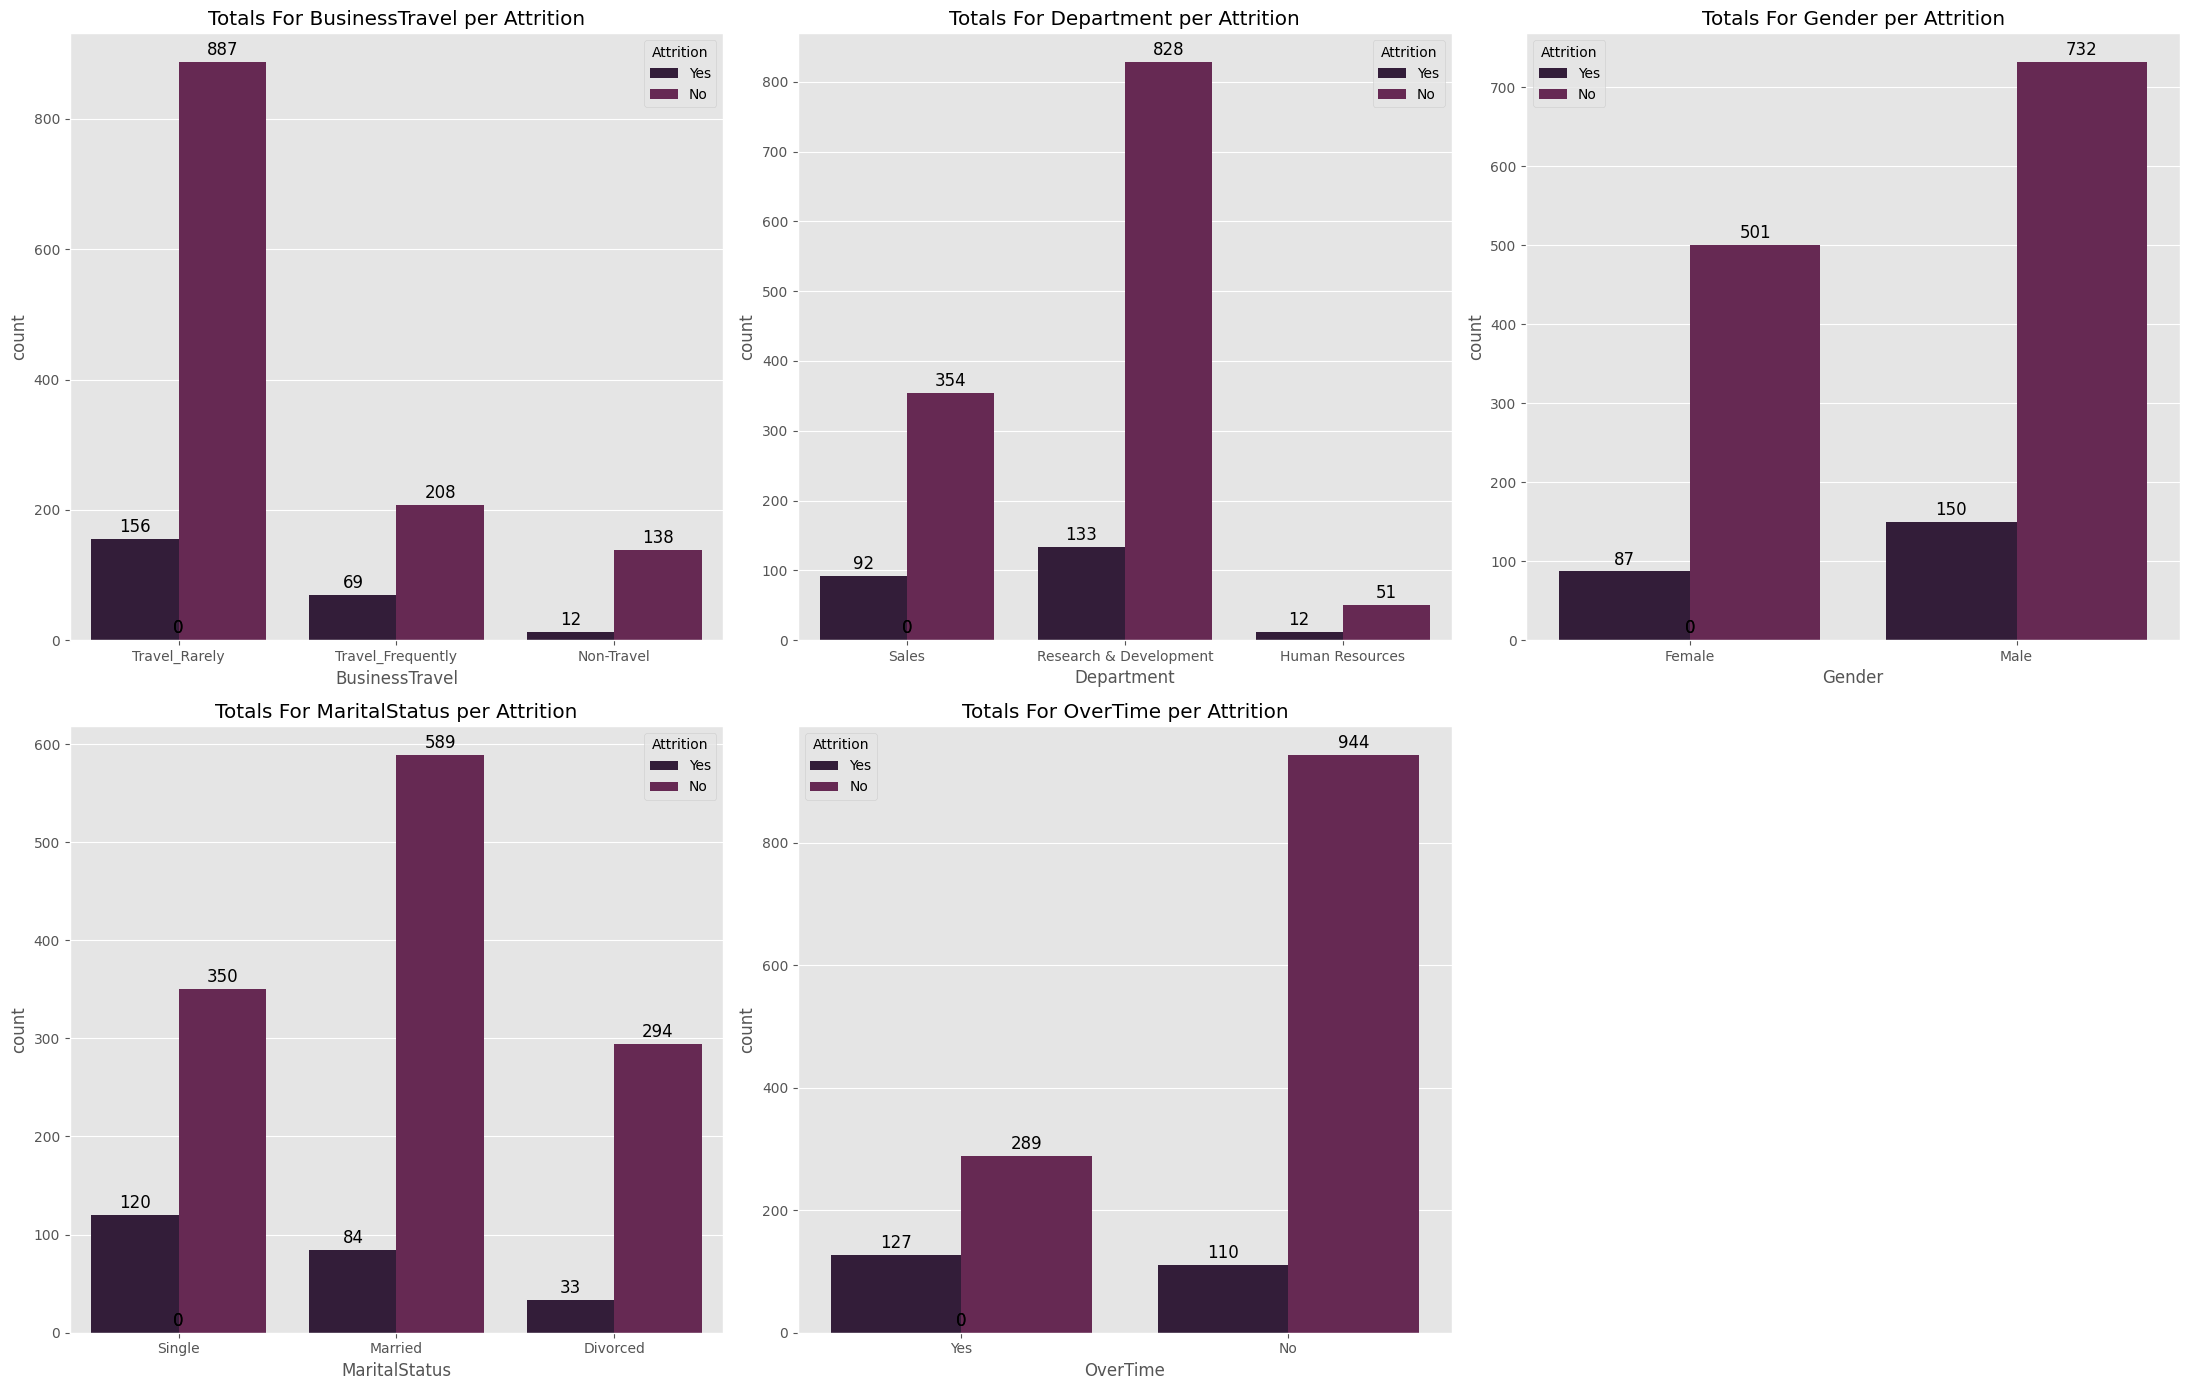

In [62]:
plt.figure(figsize=(22, 14))
for i, column in enumerate(category_one):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(df3, x=column, hue='Attrition', stat='count')
    plt.title(f'Totals For {column} per Attrition')

    # Add values at the top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

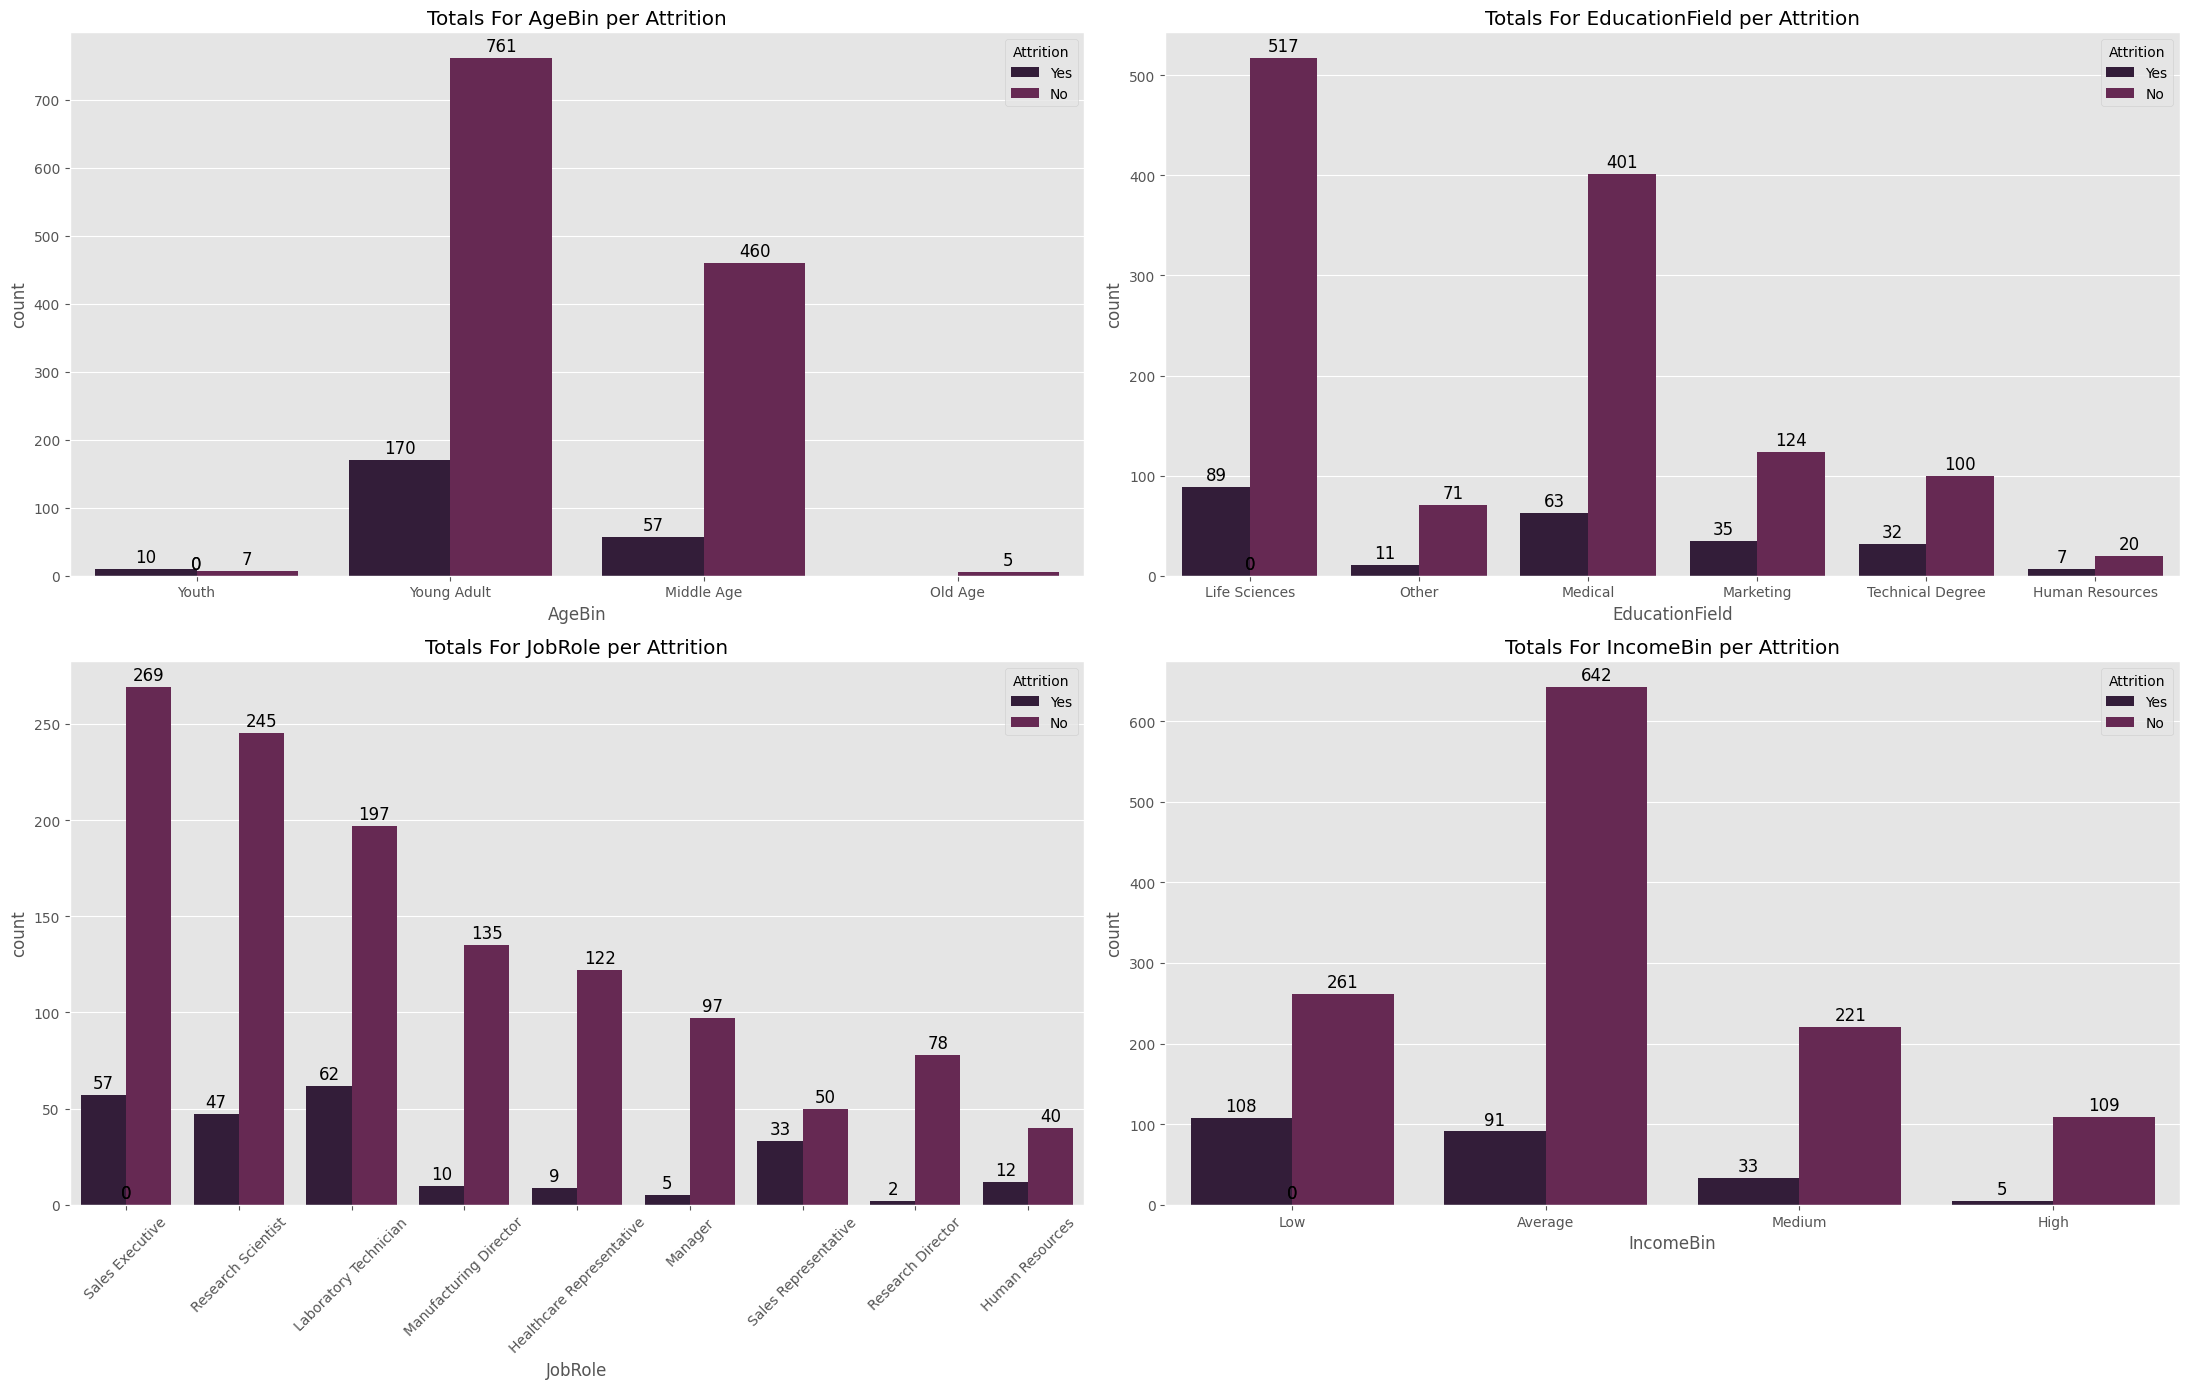

In [63]:
plt.figure(figsize=(22, 14))
for i, column in enumerate(category_two):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(df3, x=column, hue='Attrition', stat='count')
    plt.title(f'Totals For {column} per Attrition')

    if column == 'JobRole':
        # Rotate x-axis labels
        plt.xticks(rotation=45)

        # Add values at the top of each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')
            
    else:
        # Add values at the top of each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=12, color='black', 
                        xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### 1. **Which profession cluster has the lowest retention rate?**

In [64]:
# Reassign the values in the Cluster feature based on mapping
cluster_mapping = {
    0: 'Early-career professional',
    1: 'Mid-career professional',
    2: 'Senior Executives',
    3: 'Experienced senior professional',
    4: 'Highly experienced late-career professionals', 
    5: 'Veteran Professional', 
    6: 'Mid-to-senior professionals', 
    7: 'Specialized professionals', 
    8: 'Experienced Mid-Salary Professionals'
}
analysis_df['Cluster'] = analysis_df['Cluster'].map(cluster_mapping)

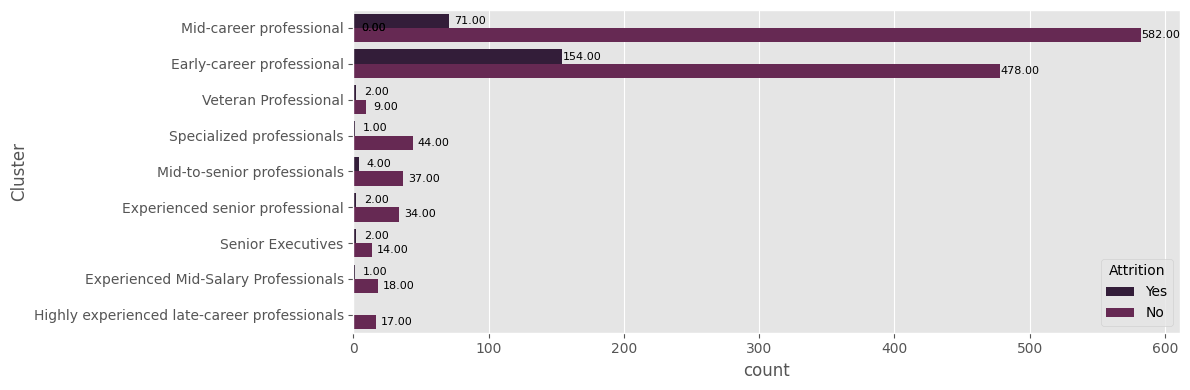

In [65]:
plt.figure(figsize=(12, 4))

ax = sns.countplot(analysis_df, y='Cluster', hue='Attrition')

# Add values at the end of each bar (right side of each bar for vertical orientation)
for p in ax.patches:
    ax.annotate(f'{float(p.get_width()):.2f}', 
                (p.get_width()+10, p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=8, color='black', 
                xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


In [66]:
retention_attrition_pivot = (
    analysis_df.pivot_table(
    values='AgeBin', index='Cluster',
    columns='Attrition', aggfunc='count',
    fill_value=0
    ).sort_values(by='Yes', ascending=False)
)

retention_attrition_pivot['RetentionToAttritionRate'] = (
    np.where(
        retention_attrition_pivot['Yes'] != 0,
        retention_attrition_pivot['No'] / retention_attrition_pivot['Yes'],
        0
    )
)

retention_attrition_pivot = round(retention_attrition_pivot, 2)
retention_attrition_pivot

Attrition,No,Yes,RetentionToAttritionRate
Cluster,,,
Early-career professional,478,154,3.10
Mid-career professional,582,71,8.20
Mid-to-senior professionals,37,4,9.25
Senior Executives,14,2,7.00
Experienced senior professional,34,2,17.00
Veteran Professional,9,2,4.50
Experienced Mid-Salary Professionals,18,1,18.00
Specialized professionals,44,1,44.00
Highly experienced late-career professionals,17,0,0.00


Based on the bar plot and pivot tables above, we can see that the attrition rate within the Early-career professional cluster is low compared to the other clusters. This ratio tells us that for every 3.10 employees retained, 1 employee leaves the organisation. This tells us that Employees from this cluster, are the most likely to leave the organisation. 

#### 2. **What is the average Age of Early-career professionals?**

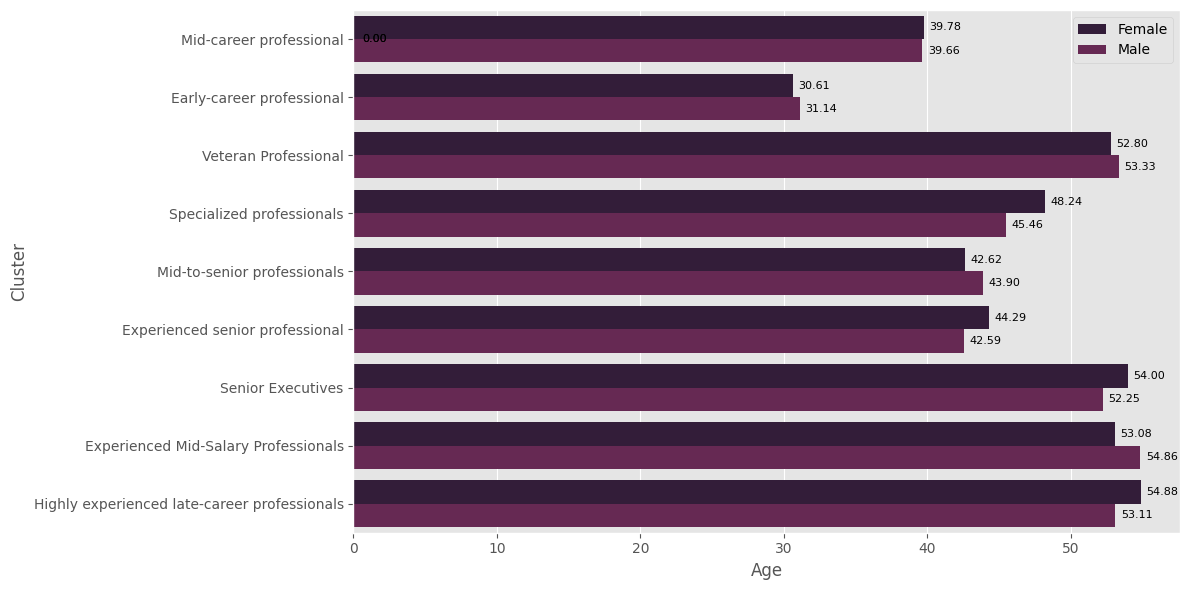

In [67]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(analysis_df, y='Cluster', x='Age', hue='Gender', errorbar=None)

# Add values at the end of each bar (right side of each bar for vertical orientation)
for p in ax.patches:
    ax.annotate(f'{float(p.get_width()):.2f}', 
                (p.get_width()+1, p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', fontsize=8, color='black', 
                xytext=(5, 0), textcoords='offset points')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

Based on the Bar plot above, we can see that the average age of Early-career professionals who are male is 31.14, while females is 30.61. 

#### 3. **What is the Average monthly income of Early-career professionals?**

In [68]:
cluster_income_pivot = analysis_df.groupby('Cluster')[['MonthlyIncome']].mean()\
                                  .sort_values(by='MonthlyIncome', ascending=False)\
                                  .reset_index()
cluster_income_pivot

,Cluster,MonthlyIncome
0,Senior Executives,18946.187500
1,Specialized professionals,18385.133333
2,Experienced senior professional,18293.888889
3,Highly experienced late-career professionals,18147.764706
4,Experienced Mid-Salary Professionals,12759.315789
5,Veteran Professional,12741.000000
6,Mid-to-senior professionals,10145.243902
7,Mid-career professional,6856.168453
8,Early-career professional,3459.075949


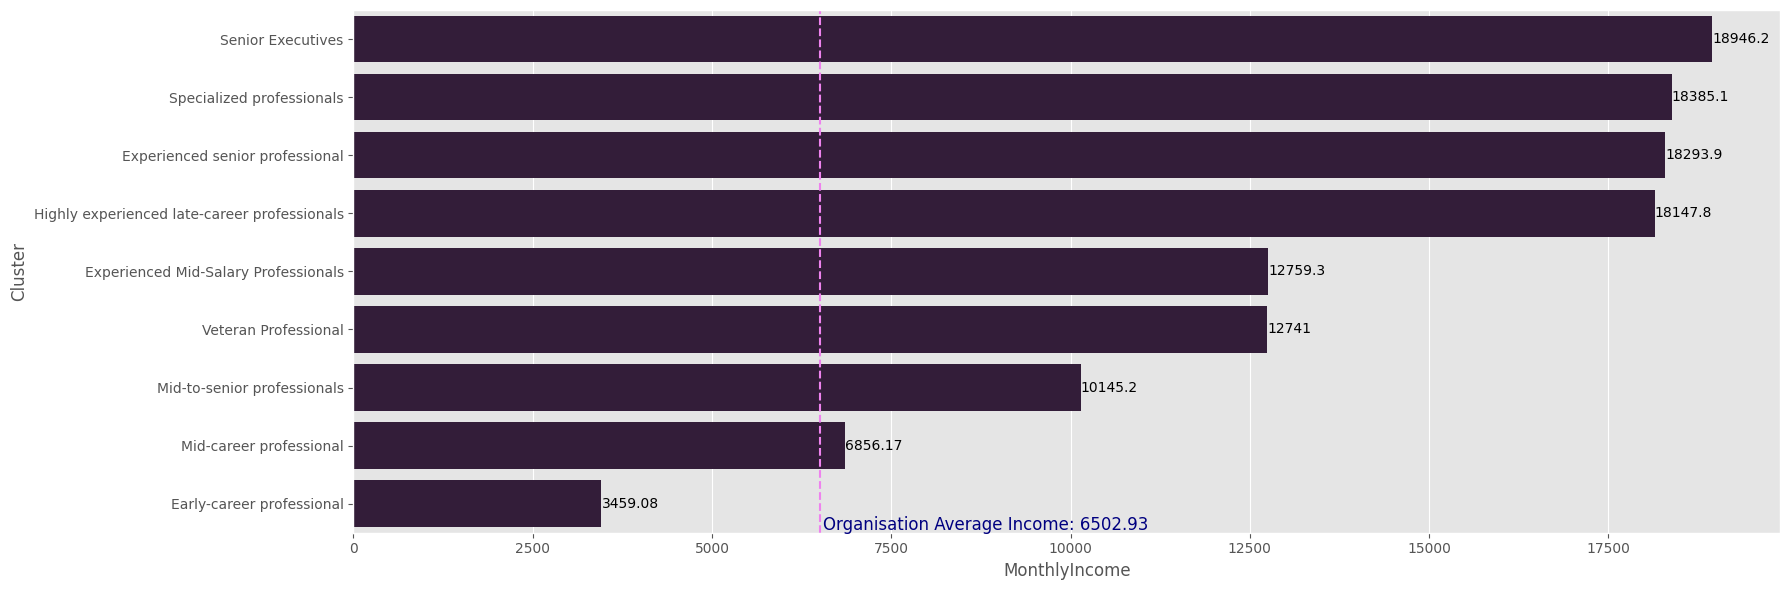

In [69]:
plt.figure(figsize=(18, 6))

ax = sns.barplot(cluster_income_pivot, y='Cluster', x='MonthlyIncome', errorbar=None)

# Add values on top of the bars
ax.bar_label(ax.containers[0])

# Add the horizontal line at the average Monthly Income of all the individuals who have left the organisation
ax.axvline(x=analysis_df['MonthlyIncome'].mean(), color='violet', linestyle='--')

# Add a label for the horizontal line
ax.text(
    y=8.45,
    x=analysis_df['MonthlyIncome'].mean() + 50,
    s=f'Organisation Average Income: {analysis_df['MonthlyIncome'].mean():.2f}',
    color='navy',
    fontsize=12
)
plt.tight_layout()
plt.show()

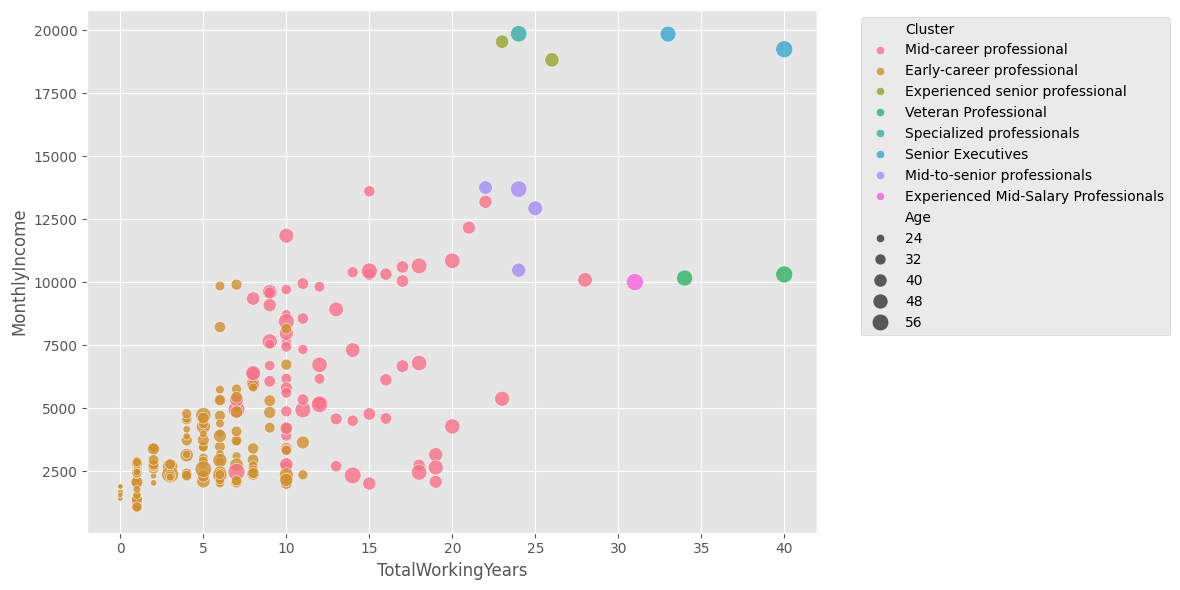

In [70]:
plt.figure(figsize=(12, 6))

ax = sns.scatterplot(
    data=analysis_df[analysis_df['Attrition'] == 'Yes'],
    x='TotalWorkingYears',
    y='MonthlyIncome',
    size='Age',
    sizes=(15, 150),
    alpha=0.8,
    hue='Cluster',
)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

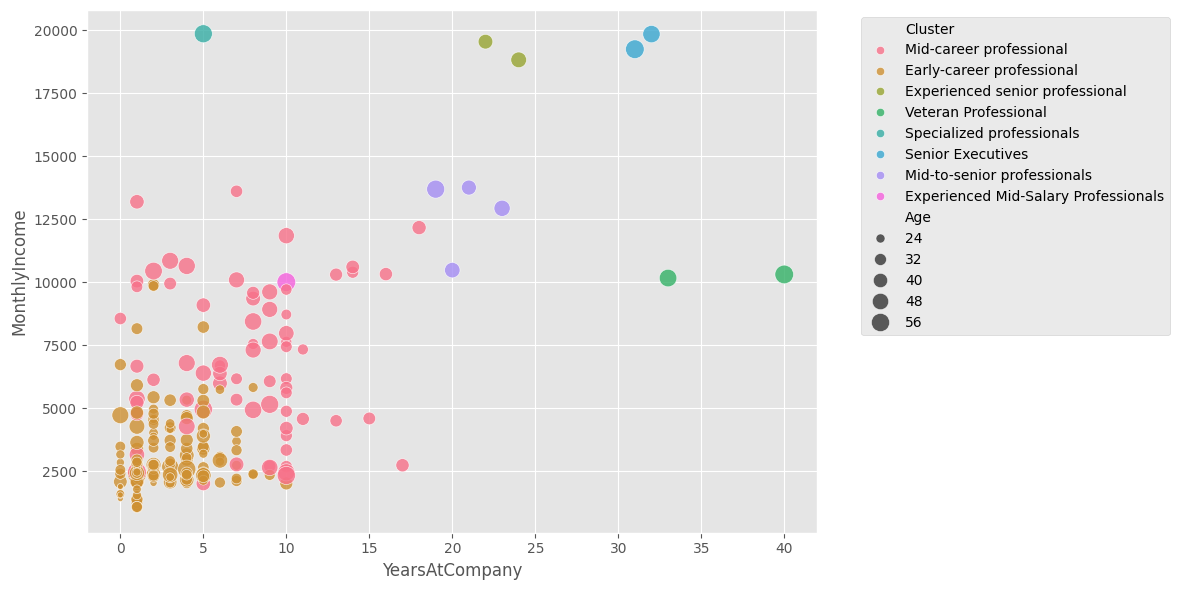

In [71]:
plt.figure(figsize=(12, 6))

ax = sns.scatterplot(
    data=analysis_df[analysis_df['Attrition'] == 'Yes'],
    x='YearsAtCompany',
    y='MonthlyIncome',
    size='Age',
    sizes=(18, 180),
    alpha=0.8,
    hue='Cluster',
)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()